# Importing requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!kaggle datasets download -d kartik2112/fraud-detection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/fraudTrain.csv')

# Basic EDA

In [ ]:
df.shape

(1296675, 23)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

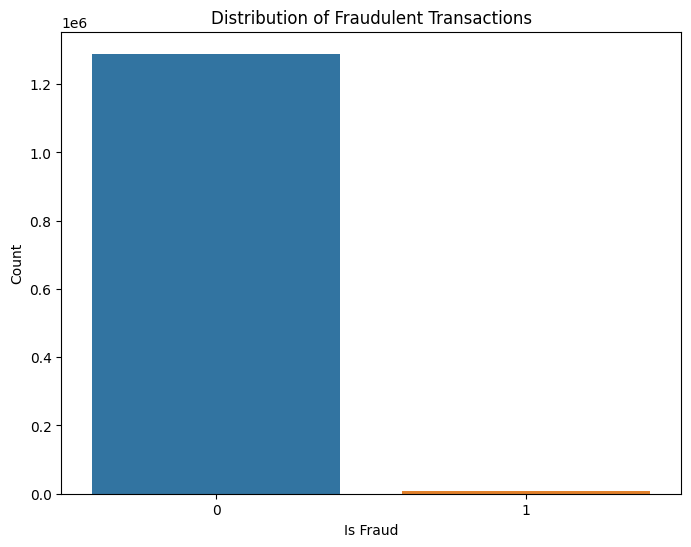

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [ ]:
df['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

# Data cleaning & Data Preprocessing

In [ ]:
#Unncessary columns
df.drop(columns=['Unnamed: 0','street','state','zip','first','last','trans_num','unix_time'],inplace=True)

Time

In [ ]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

Age

In [ ]:
#Calculate Age of each transaction
df["age"] = (df["trans_date"] - df["dob"]).dt.days //365
df['trans_month']=df['trans_date'].dt.month
df['trans_year']=df['trans_date'].dt.year

gender

In [ ]:
# The gender column is transformed to binary values
df['gender']=df['gender'].apply(lambda x : 1 if x=='M' else 0)
df['gender']=df['gender'].astype(int)

distance

In [ ]:
# Distance Calculated
df['lat_dis']=abs(df['lat']-df['merch_lat'])
df['long_dis']=abs(df['long']-df['merch_long'])

Merchant

In [ ]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

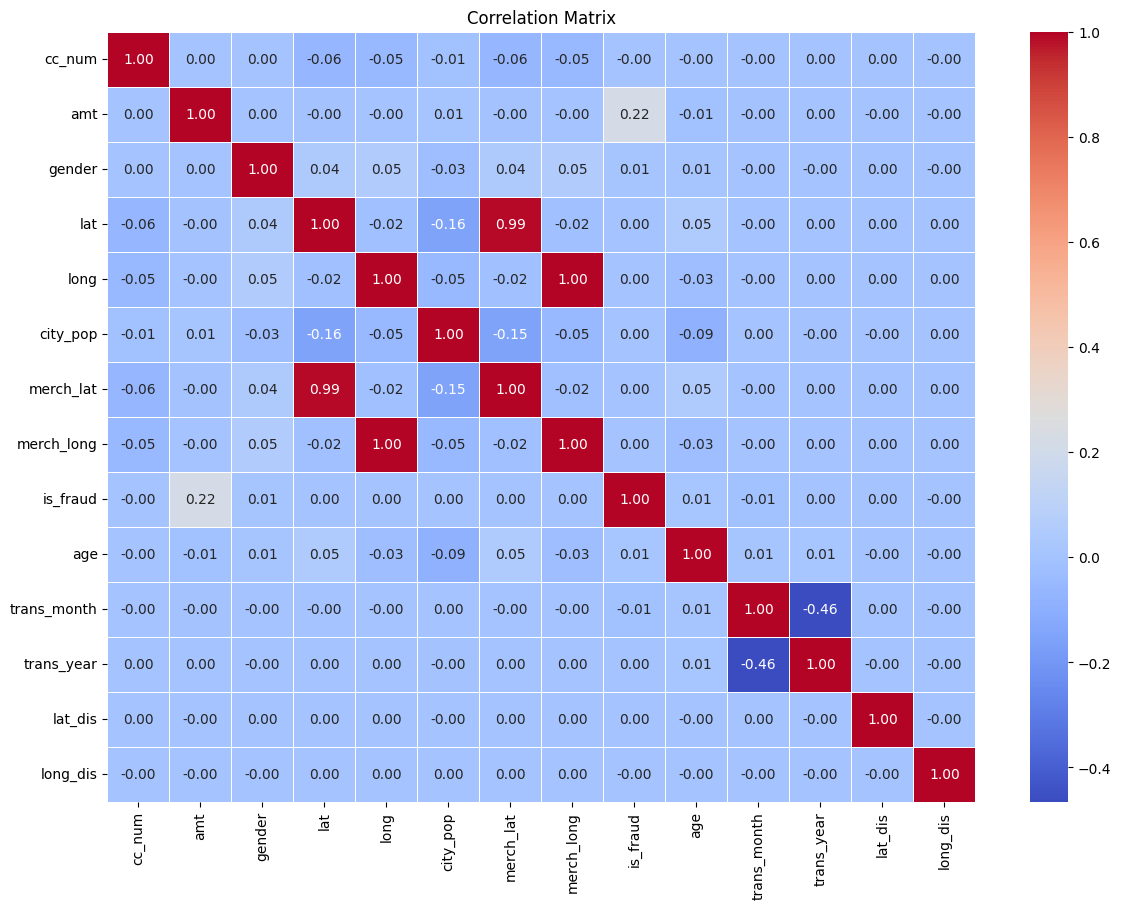

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'trans_month',
       'trans_year', 'lat_dis', 'long_dis'],
      dtype='object')

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year,lat_dis,long_dis
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30,1,2019,0.067507,0.870215
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40,1,2019,0.271247,0.024038
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,1,Malad City,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56,1,2019,0.969904,0.107519
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,52,1,2019,0.803731,0.447271
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,1,Doe Hill,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32,1,2019,0.254299,0.830441


In [ ]:
cat_columns = ['merchant','category','job','city']
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df=df.drop(columns=['trans_date_trans_time','dob','trans_date'])

In [ ]:
df.head()

,cc_num,merchant,category,amt,gender,city,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,trans_month,trans_year,lat_dis,long_dis
0,2703186189652095,514,8,4.97,0,526,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,30,1,2019,0.067507,0.870215
1,630423337322,241,4,107.23,0,612,48.8878,-118.2105,149,428,49.159047,-118.186462,0,40,1,2019,0.271247,0.024038
2,38859492057661,390,0,220.11,1,468,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,56,1,2019,0.969904,0.107519
3,3534093764340240,360,2,45.00,1,84,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,52,1,2019,0.803731,0.447271
4,375534208663984,297,9,41.96,1,216,38.4207,-79.4629,99,116,38.674999,-78.632459,0,32,1,2019,0.254299,0.830441


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  int64  
 2   category     1296675 non-null  int64  
 3   amt          1296675 non-null  float64
 4   gender       1296675 non-null  int64  
 5   city         1296675 non-null  int64  
 6   lat          1296675 non-null  float64
 7   long         1296675 non-null  float64
 8   city_pop     1296675 non-null  int64  
 9   job          1296675 non-null  int64  
 10  merch_lat    1296675 non-null  float64
 11  merch_long   1296675 non-null  float64
 12  is_fraud     1296675 non-null  int64  
 13  age          1296675 non-null  int64  
 14  trans_month  1296675 non-null  int64  
 15  trans_year   1296675 non-null  int64  
 16  lat_dis      1296675 non-null  float64
 17  long_dis     1296675 non-null  float64
dtypes:

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1037340, 17)
X_test shape: (259335, 17)
y_train shape: (1037340,)
y_test shape: (259335,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

# Models

Logestic Regression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257780
           1       0.00      0.00      0.00      1555

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



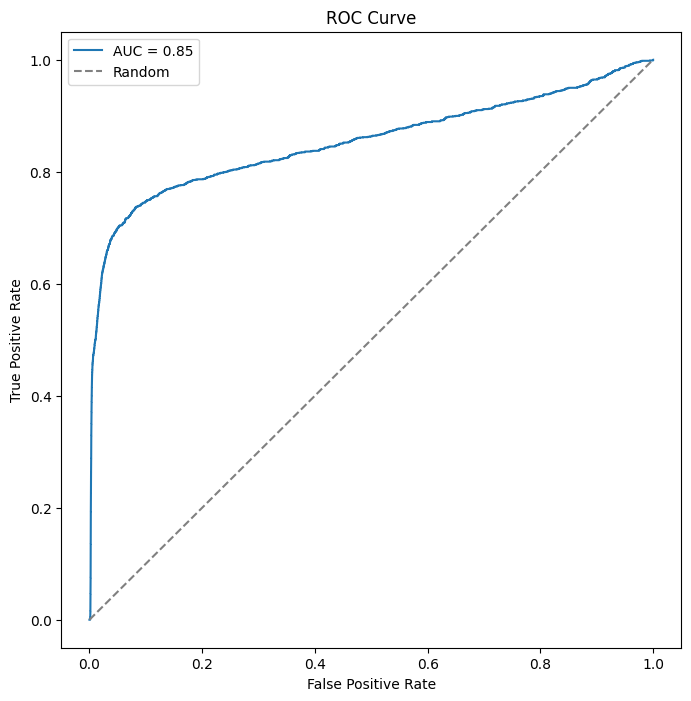

In [ ]:
import matplotlib.pyplot as plt

# Calculate AUC
y_prob_logistic = logistic_regression.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob_logistic)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

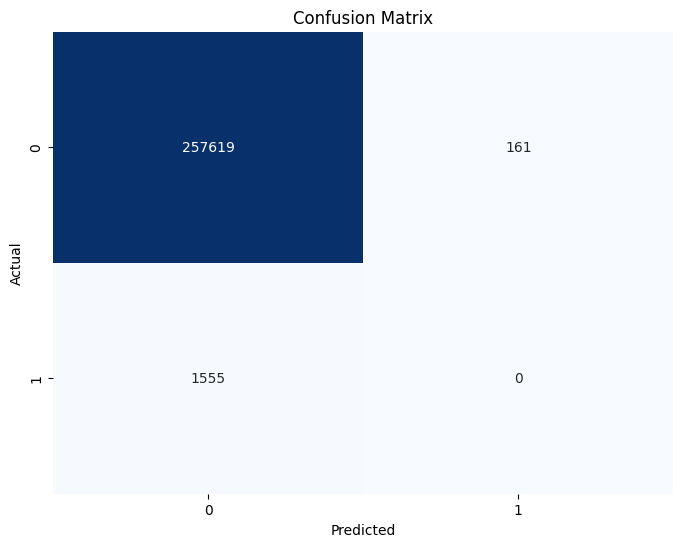

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1_logistic = f1_score(y_test, y_pred_logistic)

print("F1 Score for Logistic Regression:", f1_logistic)

F1 Score for Logistic Regression: 0.0


DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the Decision Tree model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree Classifier:", accuracy_dt)

# Display classification report for Decision Tree
print("\nClassification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))


Accuracy for Decision Tree Classifier: 0.9955154529855207

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257780
           1       0.62      0.67      0.64      1555

    accuracy                           1.00    259335
   macro avg       0.81      0.84      0.82    259335
weighted avg       1.00      1.00      1.00    259335



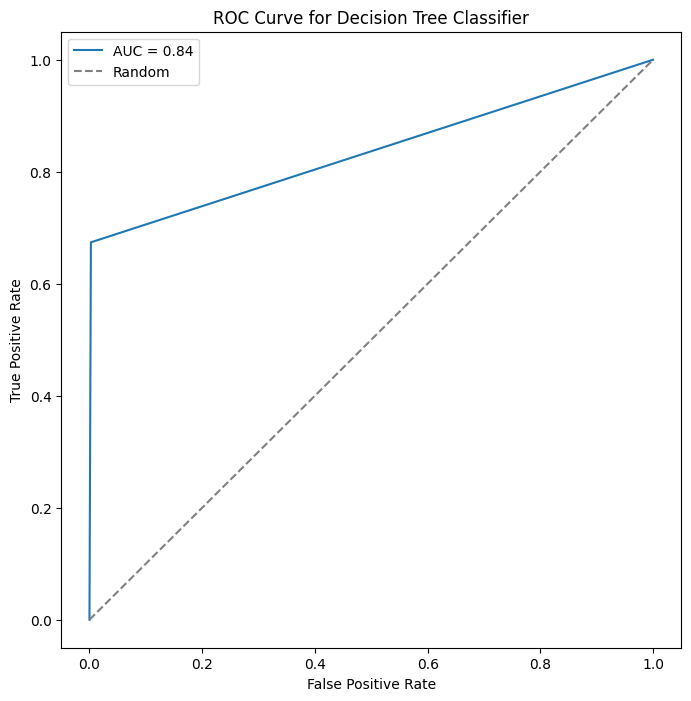

In [ ]:
# Calculate AUC for Decision Tree
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
auc_score_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {auc_score_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

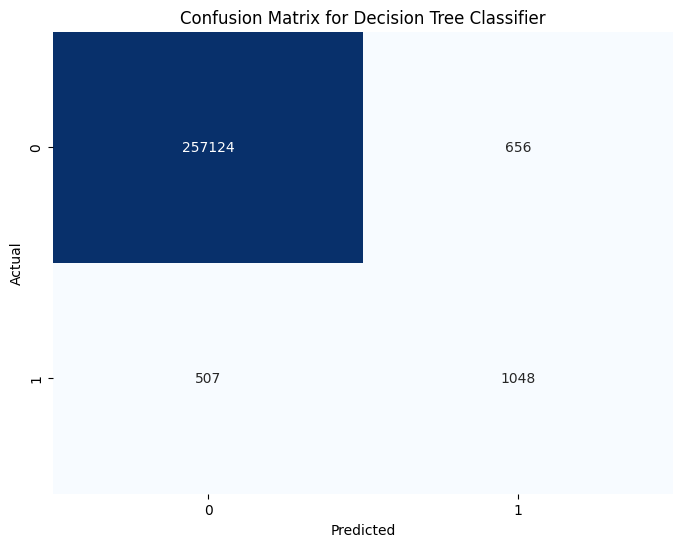

In [ ]:
# Calculate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score for Decision Tree
f1_dt = f1_score(y_test, y_pred_dt)
print("F1 Score for Decision Tree Classifier:", f1_dt)

F1 Score for Decision Tree Classifier: 0.6431420681190549


NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the Naive Bayes model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy for Naive Bayes Classifier:", accuracy_nb)

# Display classification report for Naive Bayes
print("\nClassification Report for Naive Bayes Classifier:\n", classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes Classifier: 0.9901170300962077

Classification Report for Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    257780
           1       0.30      0.48      0.37      1555

    accuracy                           0.99    259335
   macro avg       0.65      0.74      0.68    259335
weighted avg       0.99      0.99      0.99    259335



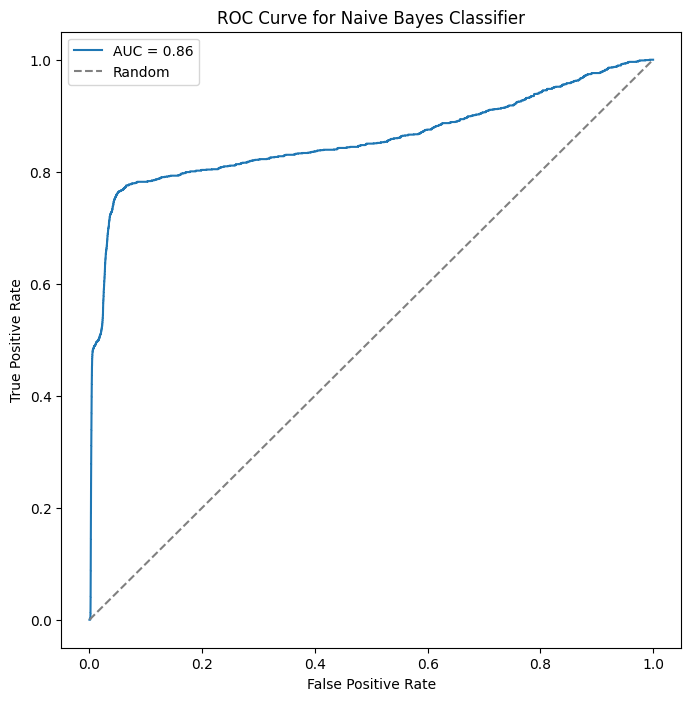

In [ ]:
# Calculate AUC for Naive Bayes
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
auc_score_nb = roc_auc_score(y_test, y_prob_nb)

# Plot ROC curve for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, label=f'AUC = {auc_score_nb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


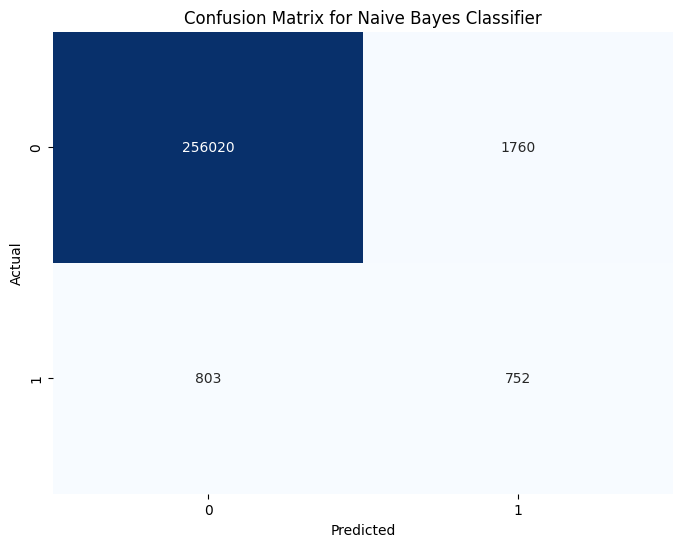

In [ ]:
# Calculate confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score for Naive Bayes
f1_nb = f1_score(y_test, y_pred_nb)
print("F1 Score for Naive Bayes Classifier:", f1_nb)

F1 Score for Naive Bayes Classifier: 0.3698057536267519


RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest Classifier:", accuracy_rf)

# Display classification report for Random Forest
print("\nClassification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))

Accuracy for Random Forest Classifier: 0.9974511731929744

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257780
           1       0.88      0.67      0.76      1555

    accuracy                           1.00    259335
   macro avg       0.94      0.83      0.88    259335
weighted avg       1.00      1.00      1.00    259335



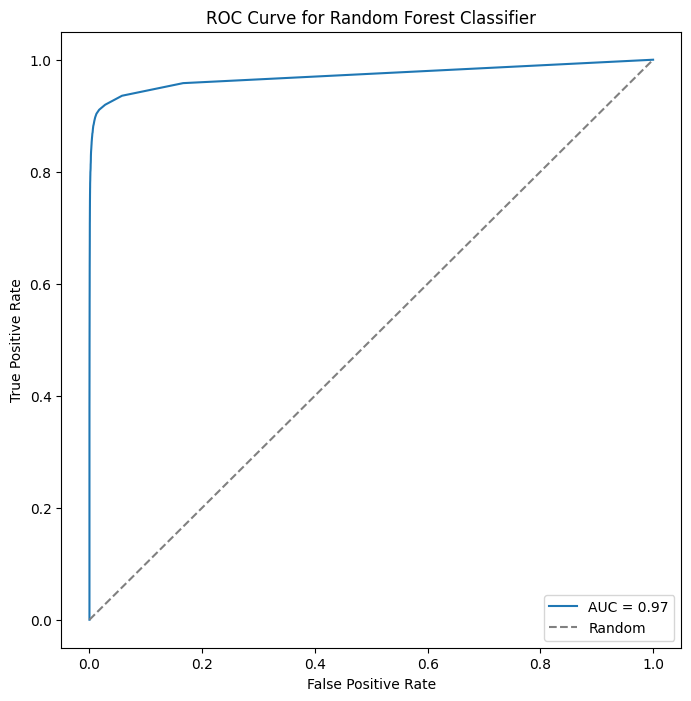

In [ ]:
# Calculate AUC for Random Forest
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

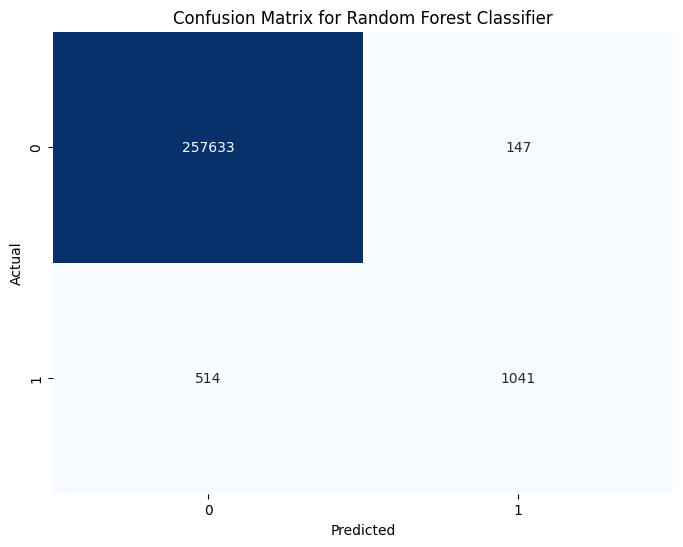

In [ ]:
# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score for Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
print("F1 Score for Random Forest Classifier:", f1_rf)

F1 Score for Random Forest Classifier: 0.7590229675537734


XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create and train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy for XGBoost:", accuracy_xgb)

# Display classification report
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Accuracy for XGBoost: 0.9941157190506488

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257780
           1       0.51      0.56      0.53      1555

    accuracy                           0.99    259335
   macro avg       0.75      0.78      0.76    259335
weighted avg       0.99      0.99      0.99    259335



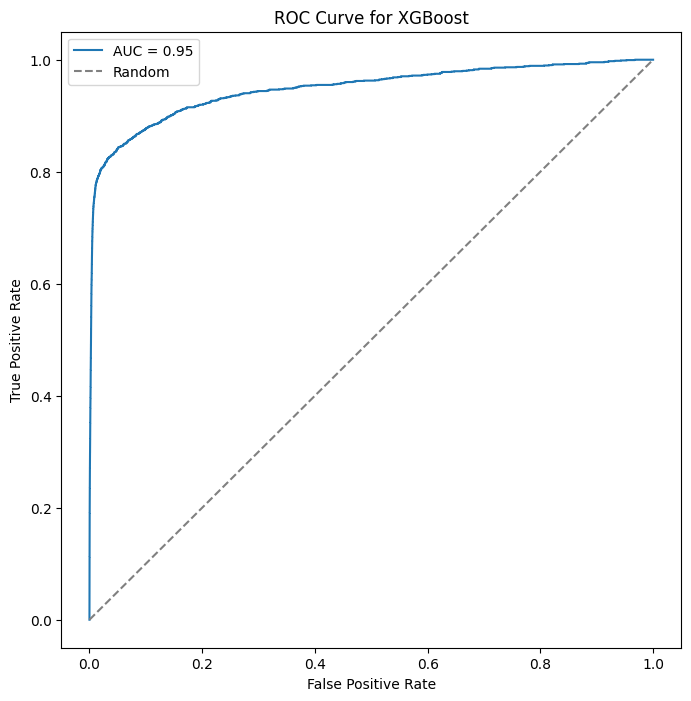

In [ ]:
# Calculate AUC
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plot ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {auc_score_xgb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

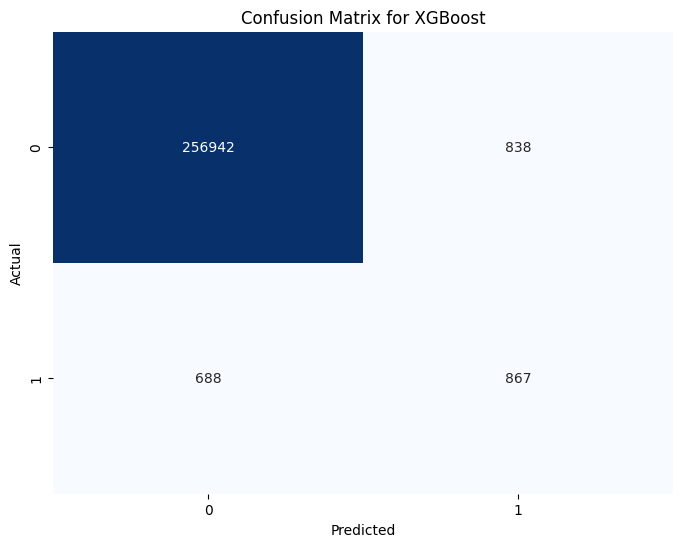

In [ ]:
# Calculate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score for XGBoost:", f1_xgb)

F1 Score for XGBoost: 0.5319018404907975


Light GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Create and train LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy for LightGBM:", accuracy_lgbm)

# Display classification report
print("\nClassification Report for LightGBM:\n", classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 5951, number of negative: 1031389
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.405145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005737 -> initscore=-5.155102
[LightGBM] [Info] Start training from score -5.155102
Accuracy for LightGBM: 0.9943740721460659

Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257780
           1       0.53      0.60      0.56      1555

    accuracy                           0.99    259335
   macro avg       0.76      0.80      0.78    259335
weighted avg       0.99      0.99      0.99    259335



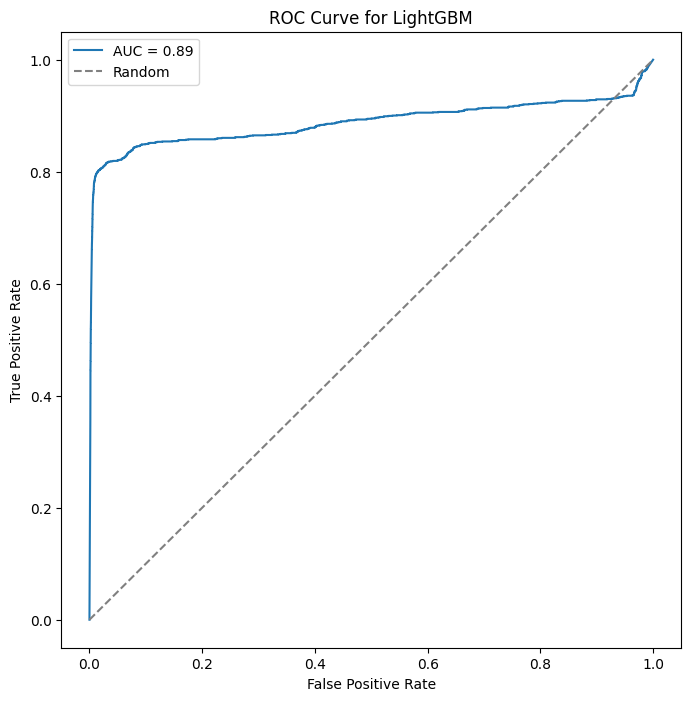

In [ ]:
# Calculate AUC
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
auc_score_lgbm = roc_auc_score(y_test, y_prob_lgbm)

# Plot ROC curve
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
plt.figure(figsize=(8, 8))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC = {auc_score_lgbm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

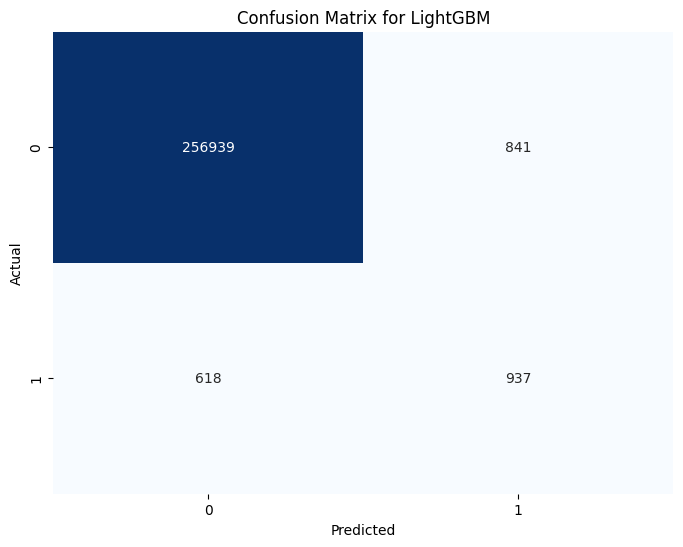

In [ ]:
# Calculate confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score
f1_lgbm = f1_score(y_test, y_pred_lgbm)
print("F1 Score for LightGBM:", f1_lgbm)

F1 Score for LightGBM: 0.5622562256225622


# PipeLine


Logistic Regression Pipeline:
Accuracy: 0.9955355134519425
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



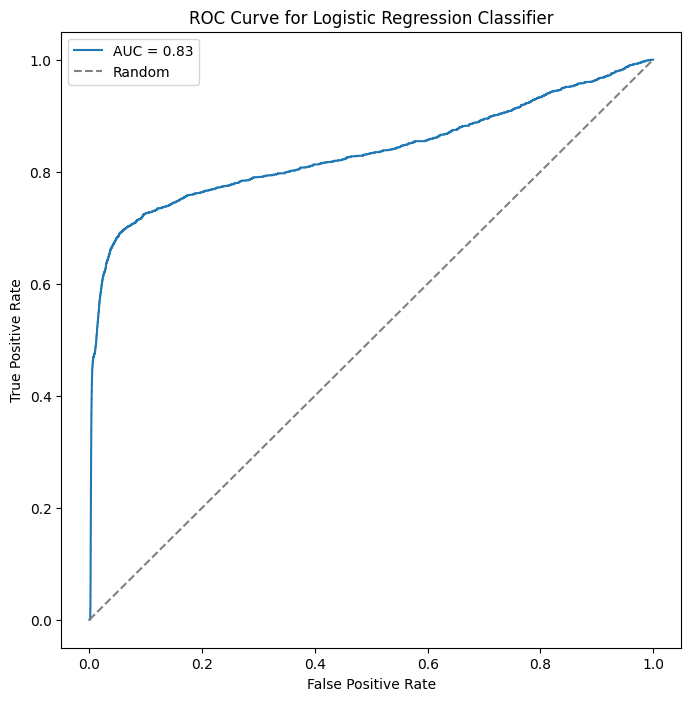

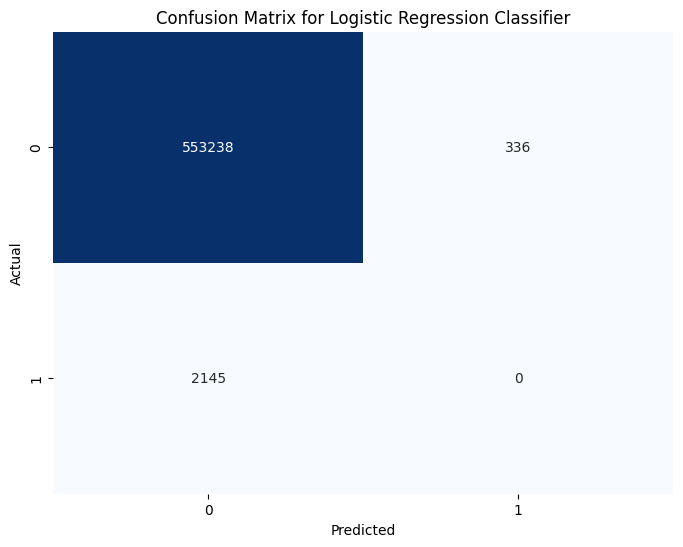

F1 Score : 0.0

Decision Tree Pipeline:
Accuracy: 0.9964082566908815
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.53      0.60      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.76      0.80      0.78    555719
weighted avg       1.00      1.00      1.00    555719



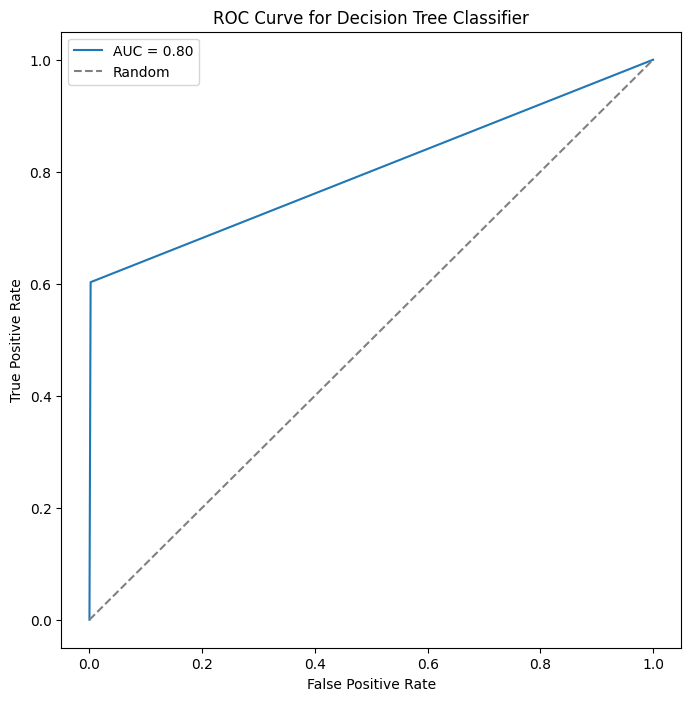

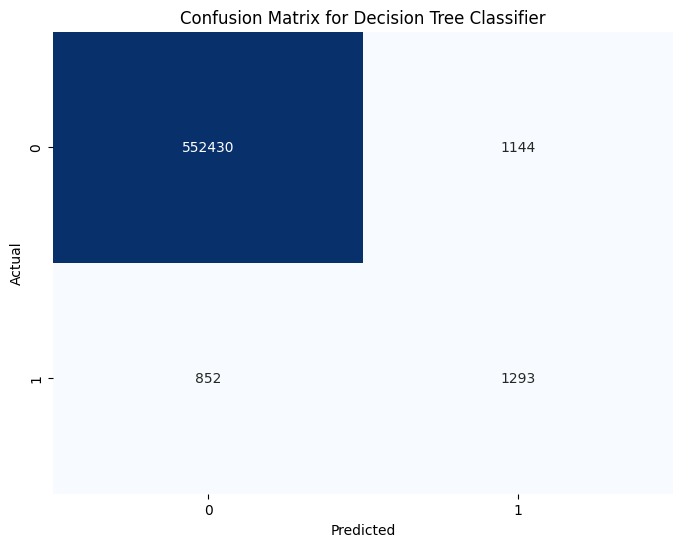

F1 Score : 0.5643823657791358

Naive Bayes Pipeline:
Accuracy: 0.9919401712016325
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.23      0.47      0.31      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.73      0.65    555719
weighted avg       0.99      0.99      0.99    555719



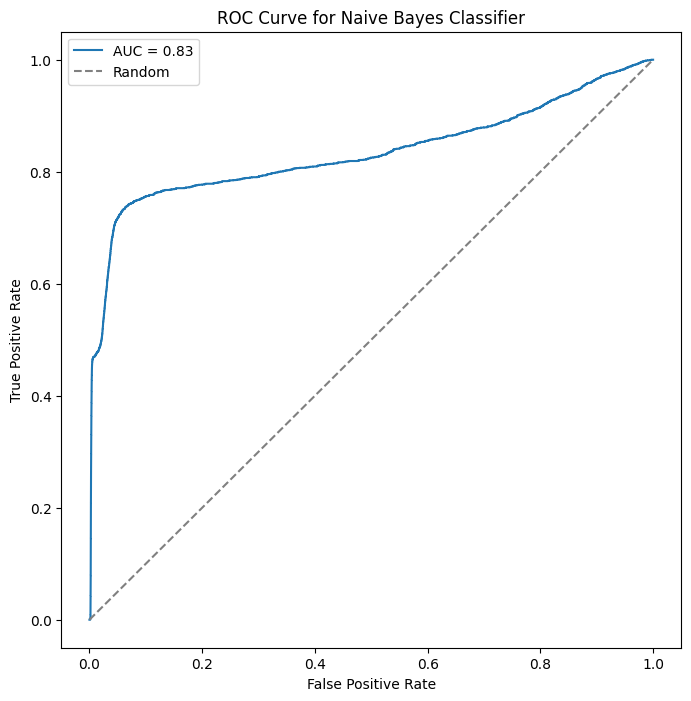

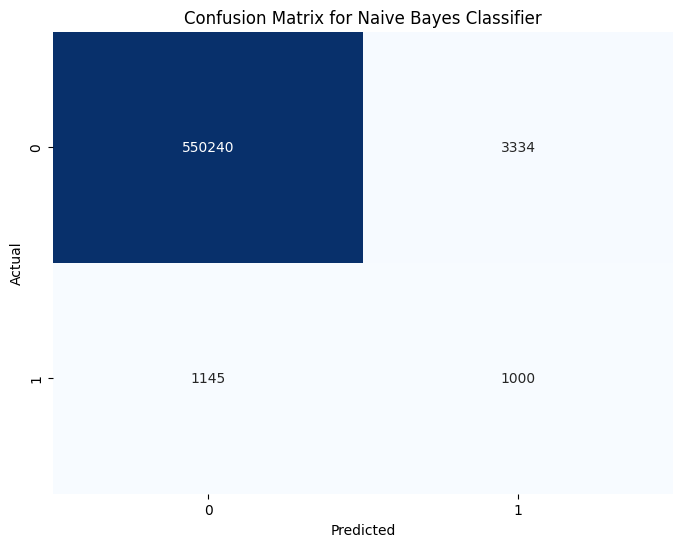

F1 Score : 0.30868961259453614

Random Forest Pipeline:
Accuracy: 0.9977488622847158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.53      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.76      0.82    555719
weighted avg       1.00      1.00      1.00    555719



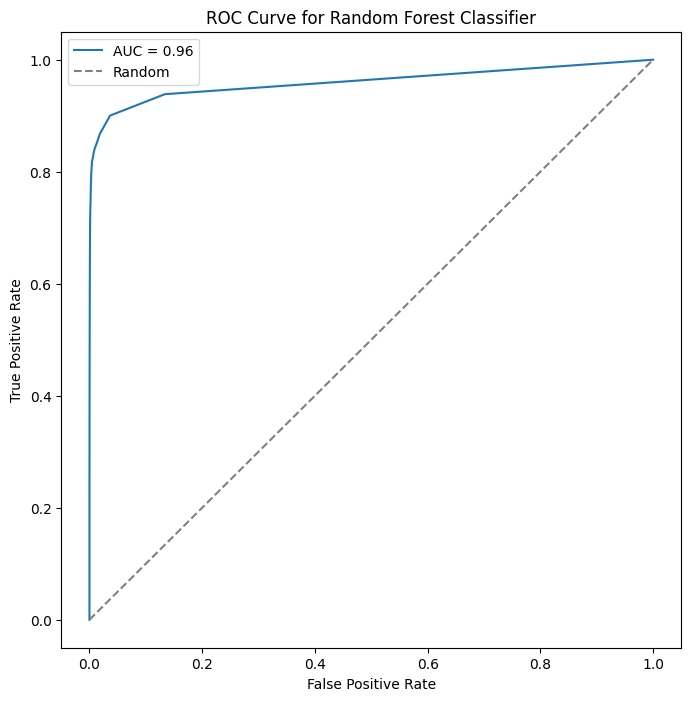

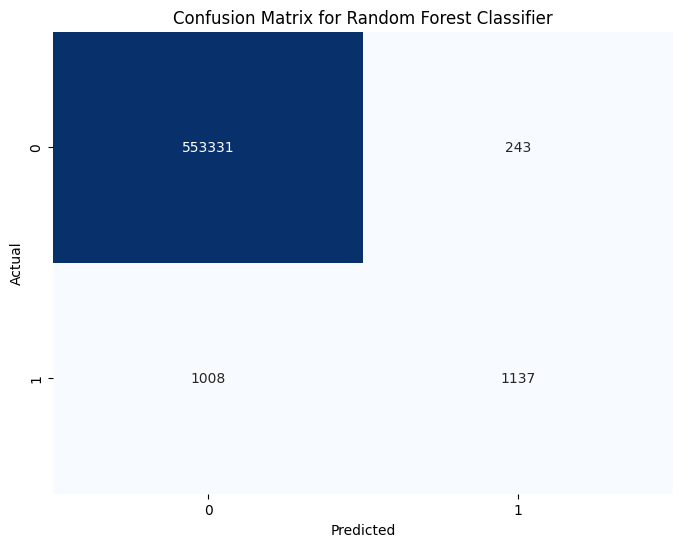

F1 Score : 0.6451063829787235

XGBoost Pipeline:
Accuracy: 0.9973853692243742
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.81      0.42      0.55      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.71      0.78    555719
weighted avg       1.00      1.00      1.00    555719



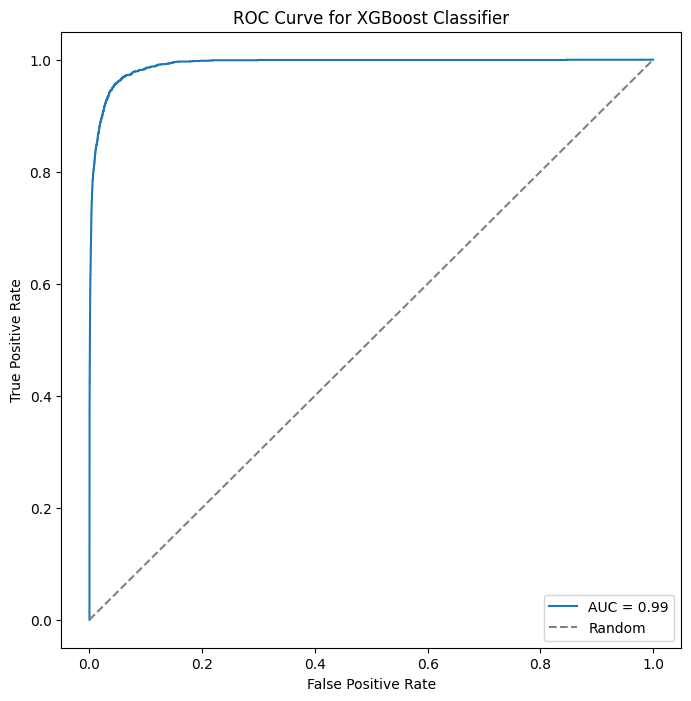

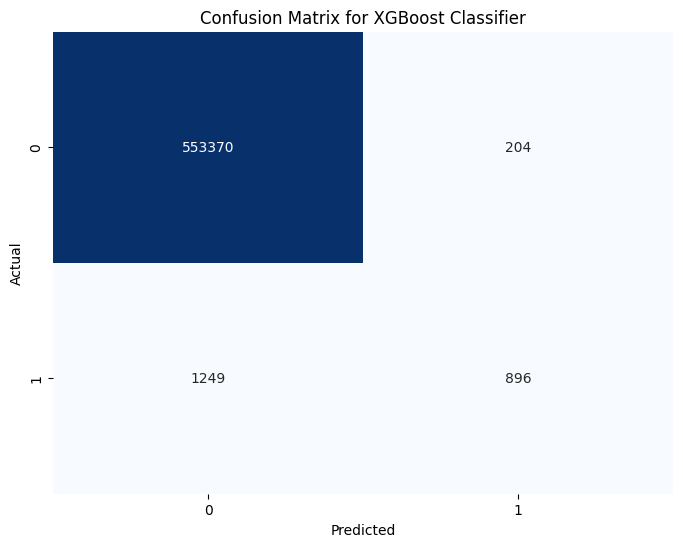

F1 Score : 0.5522342064714947

Light GBM Pipeline:
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050
Accuracy: 0.9959835816302843
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.56      0.52      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.78      0.76    555719
weighted avg       1.00      1.00      1.00    555719



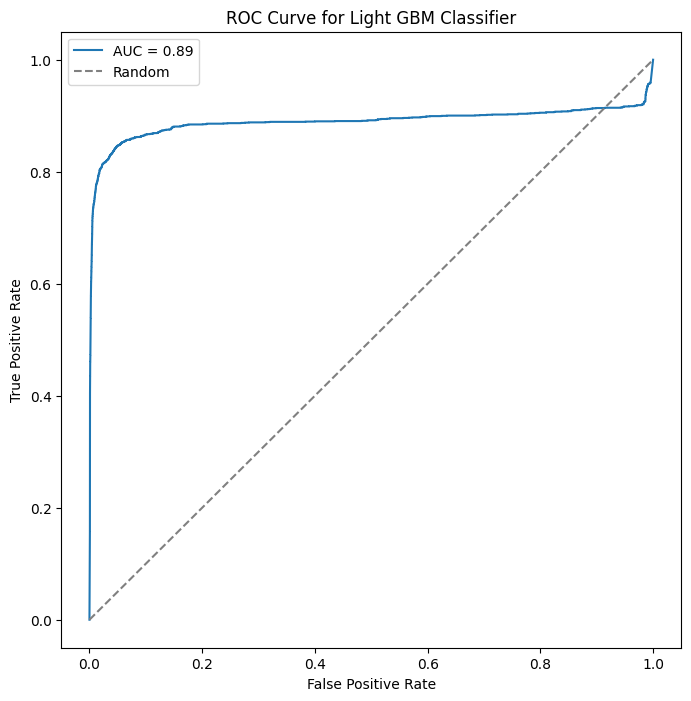

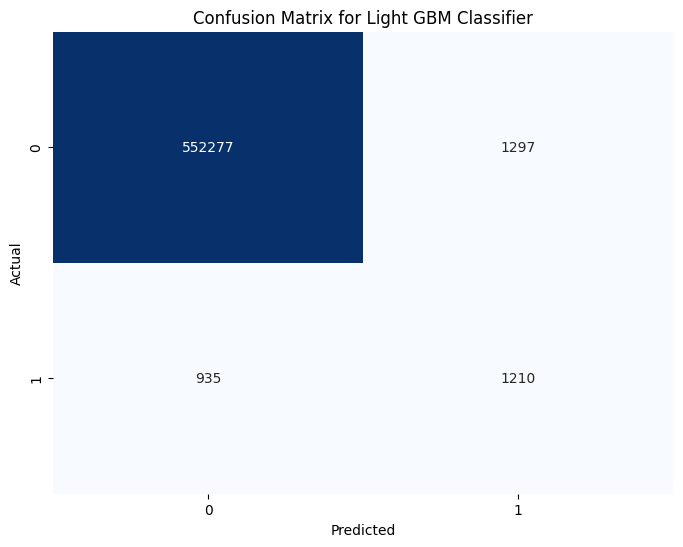

F1 Score : 0.5202063628546862


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load your data
df = pd.read_csv('/content/drive/MyDrive/Kaggle/fraudTest.csv')

# Unnecessary columns
df.drop(columns=['Unnamed: 0', 'street', 'state', 'zip', 'first', 'last', 'trans_num', 'unix_time'], inplace=True)

# Time
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

# Calculate Age of each transaction
df["age"] = (df["trans_date"] - df["dob"]).dt.days // 365
df['trans_month'] = df['trans_date'].dt.month
df['trans_year'] = df['trans_date'].dt.year

# The gender column is transformed to binary values
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
df['gender'] = df['gender'].astype(int)

# Distance Calculated
df['lat_dis'] = abs(df['lat'] - df['merch_lat'])
df['long_dis'] = abs(df['long'] - df['merch_long'])

# Merchant
df['merchant'] = df['merchant'].apply(lambda x: x.replace('fraud_', ''))

# Label Encoding
label_encoder = LabelEncoder()
cat_columns = ['merchant', 'category', 'job', 'city']
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

df = df.drop(columns=['trans_date_trans_time', 'dob', 'trans_date'])

# Define features (X) and target variable (y)
X1 = df.drop('is_fraud', axis=1)
y1 = df['is_fraud']

# Define categorical and numerical features
categorical_cols = ['merchant', 'category', 'job', 'city']
numerical_cols = ['lat', 'long', 'merch_lat', 'merch_long', 'age', 'trans_month', 'trans_year', 'lat_dis', 'long_dis']

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Function to plot ROC curve
def plot_roc_curve(y_test, y_prob, label):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.title(f'ROC Curve for {label} Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, label):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {label} Classifier')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Define the undersampler
undersampler = RandomUnderSampler(random_state=15)

# Update the numeric_transformer to exclude the undersampler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Apply preprocessing to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline with undersampling
pipelines = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression())
    ])),
        ('Decision Tree', Pipeline([
        ('scaler', StandardScaler()),
        ('dt_classifier', DecisionTreeClassifier())
    ])),
    ('Naive Bayes', Pipeline([
        ('scaler', StandardScaler()),
        ('nb_classifier', GaussianNB())
    ])),
    ('Random Forest', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])),
    ('XGBoost', Pipeline([
        ('scaler', StandardScaler()),
        ('nb_classifier', XGBClassifier())
    ])),
    ('Light GBM', Pipeline([
        ('scaler', StandardScaler()),
        ('nb_classifier', LGBMClassifier())
    ]))
]

# Fit and evaluate each pipeline
for name, pipeline in pipelines:
    print(f"\n{name} Pipeline:")
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X1)
    accuracy = accuracy_score(y1, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y1, y_pred))

    # ROC Curve
    y_prob = pipeline.predict_proba(X1)[:, 1]
    plot_roc_curve(y1, y_prob, name)

    # Confusion Matrix
    plot_confusion_matrix(y1, y_pred, name)

    # Calculate F1 score
    f1 = f1_score(y1, y_pred)

    print("F1 Score :", f1)


# SVM & KNN

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['is_fraud'] = y_resampled


In [ ]:
df_resampled.shape

(15012, 18)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
Xr = df_resampled.drop('is_fraud', axis=1)
yr = df_resampled['is_fraud']

# Split the data into training and testing sets (80% training, 20% testing)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=15)

# Display the shapes of the resulting sets
print("Xr_train shape:", Xr_train.shape)
print("Xr_test shape:", Xr_test.shape)
print("yr_train shape:", yr_train.shape)
print("yr_test shape:", yr_test.shape)

Xr_train shape: (12009, 17)
Xr_test shape: (3003, 17)
yr_train shape: (12009,)
yr_test shape: (3003,)


In [ ]:
scaler = StandardScaler()
scaler.fit(Xr_train)
Xr_train=scaler.transform(Xr_train)

In [ ]:
scaler = StandardScaler()
scaler.fit(Xr_test)
Xr_test=scaler.transform(Xr_test)

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Instantiate the SVM classifier
svm_classifier = SVC(probability=True)  # Setting probability=True to enable probability estimates

# Fit the SVM model on the training data
svm_classifier.fit(Xr_train, yr_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(Xr_test)

# Calculate accuracy
accuracy_svm = accuracy_score(yr_test, y_pred_svm)
print("Accuracy for SVM Classifier:", accuracy_svm)

# Display classification report
print("\nClassification Report for SVM Classifier:\n", classification_report(yr_test, y_pred_svm))

Accuracy for SVM Classifier: 0.8634698634698634

Classification Report for SVM Classifier:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1501
           1       0.96      0.76      0.85      1502

    accuracy                           0.86      3003
   macro avg       0.88      0.86      0.86      3003
weighted avg       0.88      0.86      0.86      3003



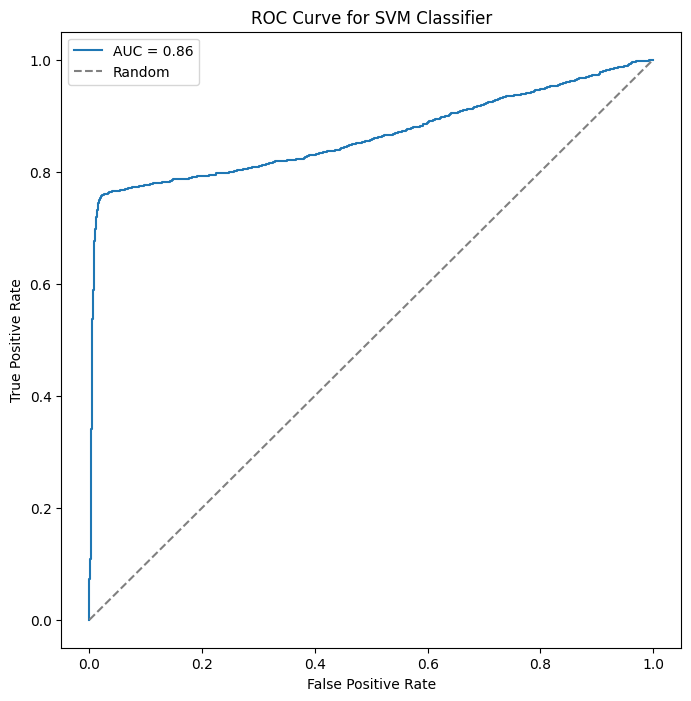

In [ ]:
# Calculate AUC for SVM
y_prob_svm = svm_classifier.predict_proba(Xr_test)[:, 1]
auc_score_svm = roc_auc_score(yr_test, y_prob_svm)

# Plot ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(yr_test, y_prob_svm)
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {auc_score_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for SVM Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

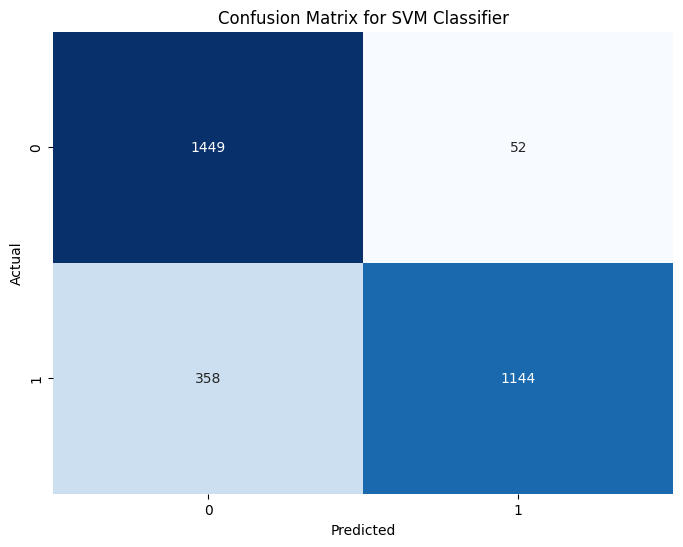

In [ ]:
# Calculate confusion matrix for SVM
cm_svm = confusion_matrix(yr_test, y_pred_svm)

# Plot confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score for SVM
f1_svm = f1_score(yr_test, y_pred_svm)
print("F1 Score for SVM Classifier:", f1_svm)

F1 Score for SVM Classifier: 0.8480355819125277


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Instantiate the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the KNN model on the training data
knn_classifier.fit(Xr_train, yr_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(Xr_test)

# Calculate accuracy for KNN
accuracy_knn = accuracy_score(yr_test, y_pred_knn)
print("Accuracy for KNN Classifier:", accuracy_knn)

# Display classification report for KNN
print("\nClassification Report for KNN Classifier:\n", classification_report(yr_test, y_pred_knn))

Accuracy for KNN Classifier: 0.7922077922077922

Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80      1501
           1       0.81      0.76      0.79      1502

    accuracy                           0.79      3003
   macro avg       0.79      0.79      0.79      3003
weighted avg       0.79      0.79      0.79      3003



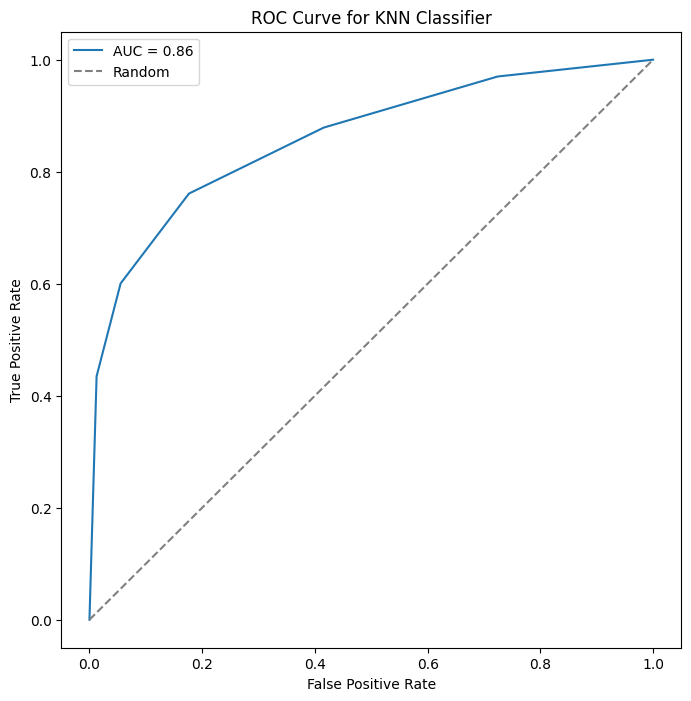

In [ ]:
# Calculate AUC for KNN
y_prob_knn = knn_classifier.predict_proba(Xr_test)[:, 1]
auc_score_knn = roc_auc_score(yr_test, y_prob_knn)

# Plot ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(yr_test, y_prob_knn)
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, label=f'AUC = {auc_score_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

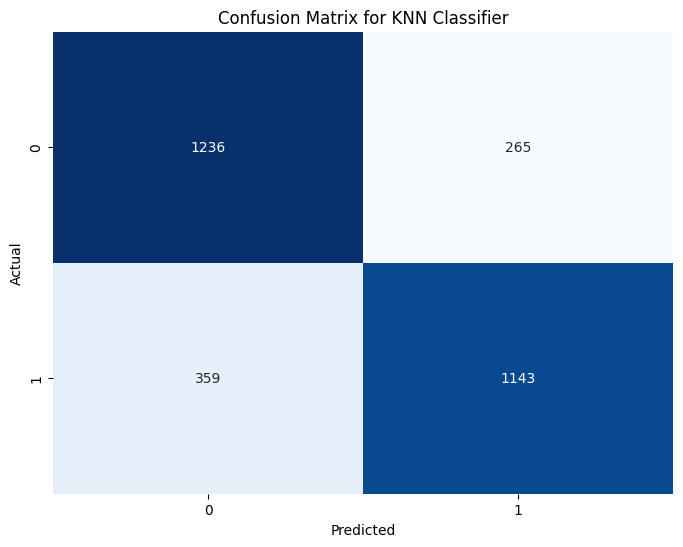

In [ ]:
# Calculate confusion matrix for KNN
cm_knn = confusion_matrix(yr_test, y_pred_knn)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate F1 score for KNN
f1_knn = f1_score(yr_test, y_pred_knn)
print("F1 Score for KNN Classifier:", f1_knn)

F1 Score for KNN Classifier: 0.7855670103092782


# SVM & KNN Pipeline


SVM Pipeline:
Accuracy: 0.9613221790149338
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.73      0.13      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.84      0.55    555719
weighted avg       1.00      0.96      0.98    555719



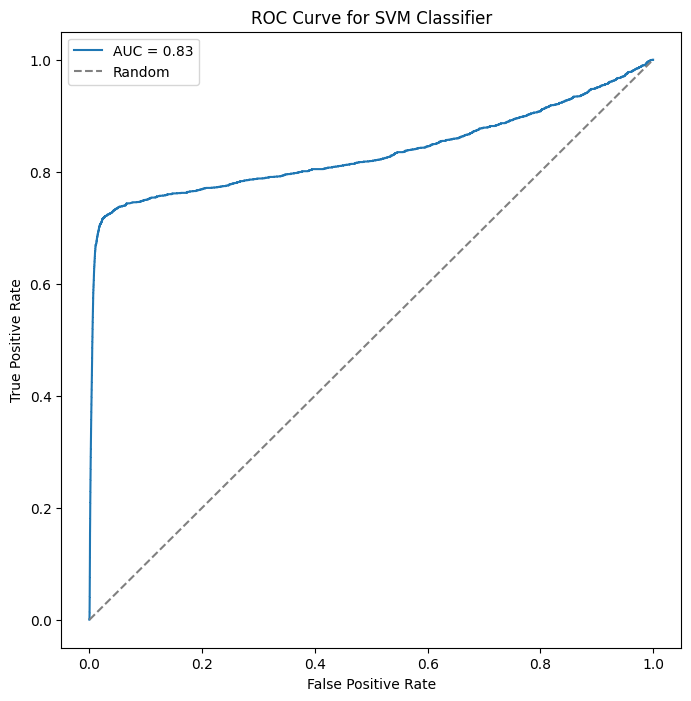

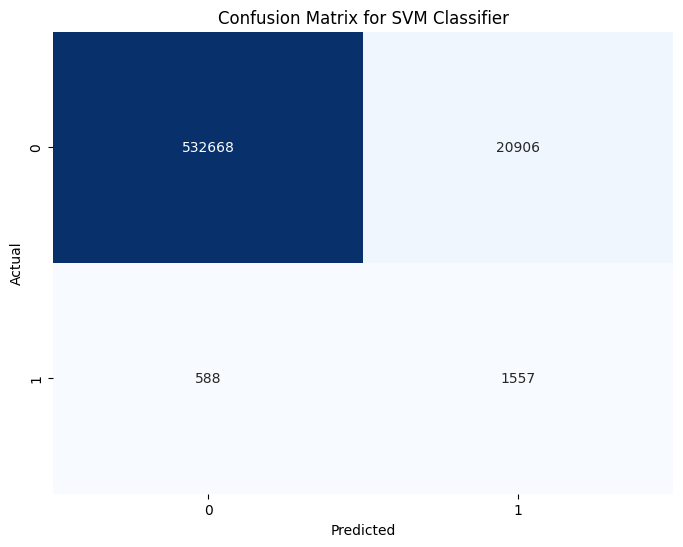

F1 Score : 0.1265442132639792

KNN Pipeline:
Accuracy: 0.7822856515613107
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88    553574
           1       0.01      0.62      0.02      2145

    accuracy                           0.78    555719
   macro avg       0.50      0.70      0.45    555719
weighted avg       0.99      0.78      0.87    555719



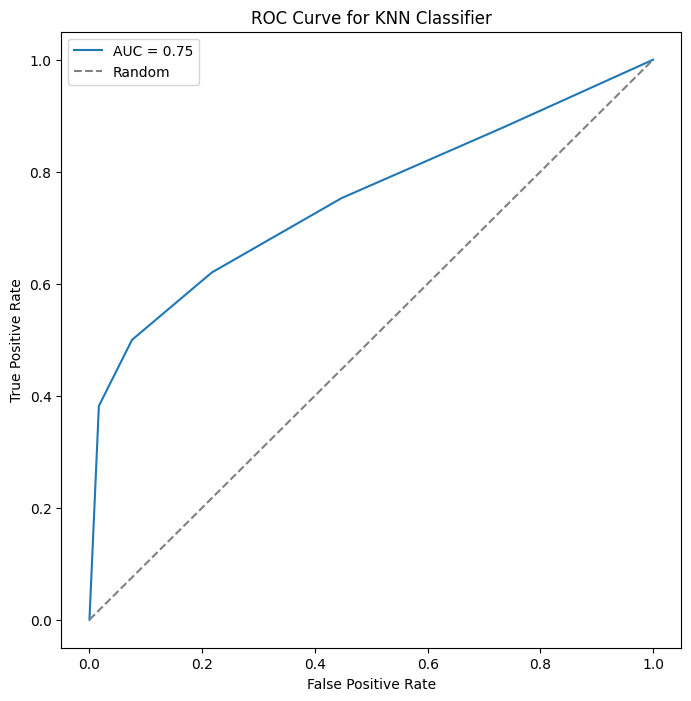

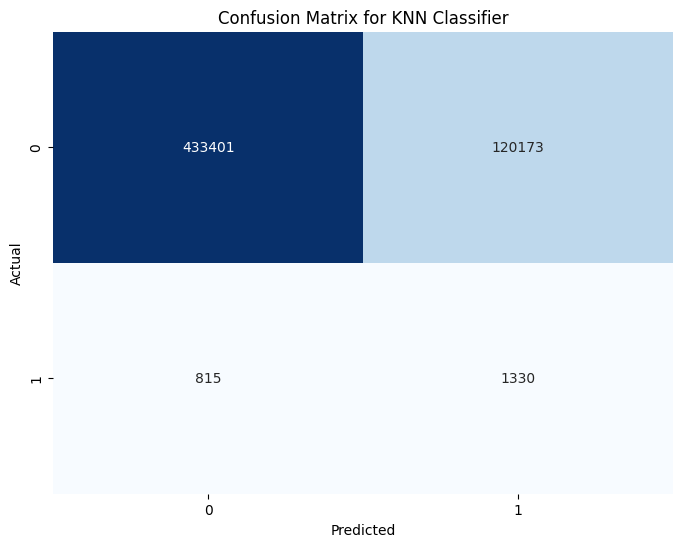

F1 Score : 0.021512681159420288


In [ ]:
# Create the pipeline with undersampling
pipelines = [
    ('SVM', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True))
    ])),
      ('KNN', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Fit and evaluate each pipeline
for name, pipeline in pipelines:
    print(f"\n{name} Pipeline:")
    pipeline.fit(Xr, yr)
    y_pred = pipeline.predict(X1)
    accuracy = accuracy_score(y1, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y1, y_pred))

    # ROC Curve
    y_prob = pipeline.predict_proba(X1)[:, 1]
    plot_roc_curve(y1, y_prob, name)

    # Confusion Matrix
    plot_confusion_matrix(y1, y_pred, name)

    # Calculate F1 score
    f1 = f1_score(y1, y_pred)

    print("F1 Score :", f1)